In [278]:
%matplotlib inline
import requests
import pandas as pd
import json
import pdb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
import random

In [280]:
random.seed(54)

In [2]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('/Users/flatironschool/Desktop/formations.sqlite')
c = conn.cursor()

In [3]:
c.execute('Select * from Player')
df_2 = pd.DataFrame(c.fetchall())
df_2.columns = [x[0] for x in c.description]

In [4]:
c.execute("""
    SELECT *
    FROM Match
    WHERE season = '2015/2016' OR season = '2014/2015' OR season = '2013/2014' OR season = '2012/2013' OR season = '2011/2012' 
""")
df_3 = pd.DataFrame(c.fetchall())
df_3.columns = [x[0] for x in c.description]
df_3.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,757,1,1,2011/2012,1,2011-07-29 00:00:00,1032692,1773,8635,2,...,1.57,7.0,4.0,1.5,6.0,3.75,1.5,6.5,4.0,1.44


In [5]:
#england only
df_3 = df_3[df_3['country_id']==1729]
df_3.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
972,2869,1729,1729,2011/2012,1,2011-08-13 00:00:00,1024172,8655,8602,1,...,3.6,2.15,3.4,3.6,2.1,3.2,3.5,2.0,3.4,3.6


In [6]:
c.execute('Select * from Team')
df_4 = pd.DataFrame(c.fetchall())
df_4.columns = [x[0] for x in c.description]
df_4.head(1)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN


In [7]:
team_id_dict = {}
for team in df_4['team_api_id'].unique():
    team_id_dict[team] = list(df_4.loc[df_4['team_api_id']==team]['team_long_name'])[0]

In [8]:
df_3['home_name'] = df_3['home_team_api_id'].map(team_id_dict)
df_3['away_name'] = df_3['away_team_api_id'].map(team_id_dict)

In [9]:
df_31_list = ['season','home_name','away_name','home_team_goal', 'away_team_goal']
df_31 = df_3[df_31_list]

In [10]:
df_31.head(1)

,season,home_name,away_name,home_team_goal,away_team_goal
972,2011/2012,Blackburn Rovers,Wolverhampton Wanderers,1,2


In [11]:
df_32=df_3[['home_name','away_name','home_team_goal','away_team_goal','home_player_Y1',
'home_player_Y2',
'home_player_Y3',
'home_player_Y4',
'home_player_Y5',
'home_player_Y6',
'home_player_Y7',
'home_player_Y8',
'home_player_Y9',
'home_player_Y10',
'home_player_Y11',
'away_player_Y1',
'away_player_Y2',
'away_player_Y3',
'away_player_Y4',
'away_player_Y5',
'away_player_Y6',
'away_player_Y7',
'away_player_Y8',
'away_player_Y9',
'away_player_Y10',
'away_player_Y11']]

In [12]:
df_32['home_form']=None
df_32['away_form']=None

/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
df_32.head(1)

,home_name,away_name,home_team_goal,away_team_goal,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,...,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_form,away_form
972,Blackburn Rovers,Wolverhampton Wanderers,1,2,1.0,3.0,3.0,3.0,3.0,7.0,...,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,None,None


In [14]:
pos_dict={0:'GK',1:'GK',2:'D',3:'D',4:'D',5:'M',6:'M',7:'M',8:'A',9:'F',10:'F',11:'F'}

In [15]:
df_33 = df_32.drop(['home_name','away_name','home_team_goal','away_team_goal','home_form','away_form'],axis=1)

In [16]:
df_33.dropna(inplace=True)

In [17]:
df_34 = df_33.applymap(lambda x: pos_dict[x])

In [18]:
df_34.head(1)

,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,...,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11
972,GK,D,D,D,D,M,M,M,F,F,...,D,D,D,D,M,M,M,M,F,F


In [19]:
df_35 = df_32.copy()

In [20]:
df_35.head(1)

,home_name,away_name,home_team_goal,away_team_goal,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,...,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_form,away_form
972,Blackburn Rovers,Wolverhampton Wanderers,1,2,1.0,3.0,3.0,3.0,3.0,7.0,...,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,None,None


In [21]:
df_35=df_32[['home_name','away_name','home_team_goal','away_team_goal']]

In [22]:
df_35['h1']=df_34['home_player_Y1']
df_35['h2']=df_34['home_player_Y2']
df_35['h3']=df_34['home_player_Y3']
df_35['h4']=df_34['home_player_Y4']
df_35['h5']=df_34['home_player_Y5']
df_35['h6']=df_34['home_player_Y6']
df_35['h7']=df_34['home_player_Y7']
df_35['h8']=df_34['home_player_Y8']
df_35['h9']=df_34['home_player_Y9']
df_35['h10']=df_34['home_player_Y10']
df_35['h11']=df_34['home_player_Y11']
df_35['a1']=df_34['away_player_Y1']
df_35['a2']=df_34['away_player_Y2']
df_35['a3']=df_34['away_player_Y3']
df_35['a4']=df_34['away_player_Y4']
df_35['a5']=df_34['away_player_Y5']
df_35['a6']=df_34['away_player_Y6']
df_35['a7']=df_34['away_player_Y7']
df_35['a8']=df_34['away_player_Y8']
df_35['a9']=df_34['away_player_Y9']
df_35['a10']=df_34['away_player_Y10']
df_35['a11']=df_34['away_player_Y11']

/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [23]:
df_35.head(1)

,home_name,away_name,home_team_goal,away_team_goal,h1,h2,h3,h4,h5,h6,...,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11
972,Blackburn Rovers,Wolverhampton Wanderers,1,2,GK,D,D,D,D,M,...,D,D,D,D,M,M,M,M,F,F


In [24]:
df_35['home_form']=None
df_35['away_form']=None
df_35.head(2)

/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,home_name,away_name,home_team_goal,away_team_goal,h1,h2,h3,h4,h5,h6,...,a4,a5,a6,a7,a8,a9,a10,a11,home_form,away_form
972,Blackburn Rovers,Wolverhampton Wanderers,1,2,GK,D,D,D,D,M,...,D,D,M,M,M,M,F,F,None,None
973,Fulham,Aston Villa,0,0,GK,D,D,D,D,M,...,D,D,M,M,M,M,F,F,None,None


In [25]:
#USE TRY-EXCEPT FOR "FOREIGN FORMATIONS"
formation_dict={('GK','D','D','D','D','M','M','M','F','F','F'):1,('GK','D','D','D','M','M','M','M','M','F','F'):2,
                ('GK','D','D','D','M','M','M','A','A','F','F'):3,('GK','D','D','D','M','M','M','M','A','F','F'):4,
                ('GK','D','D','D','M','M','A','A','F','F','F'):5,('GK','D','D','D','M','M','M','M','A','A','F'):6,
                ('GK','D','D','D','M','M','M','M','F','F','F'):7,('GK','D','D','D','D','M','M','M','M','F','F'):8,
                ('GK','D','D','D','D','M','M','M','A','F','F'):9,('GK','D','D','D','D','M','M','M','A','A','F'):10,
                ('GK','D','D','D','D','M','M','A','A','F','F'):11,('GK','D','D','D','D','M','M','M','M','A','F'):12,
                ('GK','D','D','D','D','M','M','A','A','A','F'):13,('GK','D','D','D','D','M','M','F','F','F','F'):14,
                ('GK','D','D','D','D','M','M','A','F','F','F'):15,('GK','D','D','D','D','M','M','M','M','M','F'):16,
                ('GK','D','D','D','D','D','M','D','A','F','F'):17,('GK','D','D','D','D','D','M','M','M','M','F'):18,
                ('GK','D','D','D','D','D','M','M','M','F','F'):19,('GK','D','D','D','D','D','M','M','F','F','F'):20,
                ('GK','D','D','D','D','M','M','M','F','M','F'):21,('GK','D','D','D','D','M','A','M','A','A','F'):21,
                ('GK','D','D','D','D','M','A','A','M','A','F'):21,('GK','D','D','D','D','M','M','F','M','M','F'):21,
                ('GK','D','D','D','D','A','M','M','A','A','F'):21,('GK','D','D','D','D','M','A','A','A','M','F'):21,
                ('GK', 'D', 'D', 'D', 'D', 'M', 'A', 'A', 'A', 'A', 'F'):21,
                ('GK', 'D', 'D', 'D', 'D', 'M', 'A', 'A', 'F', 'F', 'F'):21,
                ('GK', 'D', 'D', 'D', 'M', 'M', 'M', 'A', 'A', 'A', 'F'):21,
                ('GK', 'D', 'D', 'D', 'D', 'A', 'A', 'A', 'M', 'A', 'F'):21,
                ('GK', 'D', 'D', 'D', 'D', 'F', 'M', 'M', 'M', 'M', 'F'):21,
                ('GK', 'D', 'D', 'D', 'D', 'M', 'M', 'A', 'M', 'A', 'F'):21,
                ('GK', 'D', 'D', 'D', 'M', 'M', 'M', 'D', 'A', 'F', 'F'):21,
                ('GK', 'D', 'D', 'D', 'D', 'A', 'M', 'A', 'A', 'M', 'F'):21,
                ('GK', 'D', 'D', 'D', 'M', 'M', 'M', 'F', 'M', 'F', 'F'):21,
                ('GK', 'D', 'D', 'D', 'D', 'M', 'M', 'F', 'M', 'F', 'F'):21,
                ('GK', 'D', 'D', 'D', 'D', 'M', 'A', 'A', 'A', 'F', 'F'):21,
                ('GK', 'D', 'D', 'D', 'M', 'D', 'M', 'M', 'F', 'F', 'F'):21,
                ('GK', 'D', 'D', 'D', 'M', 'M', 'D', 'M', 'M', 'F', 'F'):21,
                ('GK', 'D', 'D', 'D', 'M', 'D', 'M', 'F', 'F', 'M', 'F'):21,
                ('GK', 'D', 'D', 'D', 'D', 'A', 'A', 'M', 'M', 'A', 'F'):21,
                ('GK', 'D', 'D', 'M', 'D', 'D', 'M', 'F', 'M', 'F', 'F'):21,
                ('GK', 'D', 'D', 'M', 'D', 'D', 'M', 'M', 'F', 'F', 'F'):21,
                ('GK', 'D', 'D', 'D', 'D', 'M', 'M', 'A', 'M', 'F', 'F'):21,
                ('GK', 'D', 'D', 'D', 'D', 'A', 'A', 'A', 'A', 'M', 'F'):21,
                ('GK', 'D', 'M', 'M', 'D', 'D', 'D', 'M', 'M', 'F', 'F'):21,
                ('GK', 'D', 'D', 'D', 'D', 'M', 'F', 'M', 'M', 'F', 'F'):21,
                ('GK', 'D', 'D', 'D', 'D', 'A', 'M', 'A', 'A', 'A', 'F'):21,
                ('GK', 'D', 'D', 'D', 'D', 'A', 'A', 'M', 'A', 'A', 'F'):21,
                ('GK', 'D', 'D', 'D', 'M', 'M', 'M', 'M', 'F', 'M', 'F'):21,
                ('GK', 'D', 'D', 'D', 'M', 'M', 'M', 'F', 'F', 'M', 'F'):21}

In [98]:
wild_card = [('GK','D','D','D','D','M','M','M','F','M','F'),('GK','D','D','D','D','M','A','M','A','A','F'),
                ('GK','D','D','D','D','M','A','A','M','A','F'),('GK','D','D','D','D','M','M','F','M','M','F'),
                ('GK','D','D','D','D','A','M','M','A','A','F'),('GK','D','D','D','D','M','A','A','A','M','F'),
                ('GK', 'D', 'D', 'D', 'D', 'M', 'A', 'A', 'A', 'A', 'F'),
                ('GK', 'D', 'D', 'D', 'D', 'M', 'A', 'A', 'F', 'F', 'F'),
                ('GK', 'D', 'D', 'D', 'M', 'M', 'M', 'A', 'A', 'A', 'F'),
                ('GK', 'D', 'D', 'D', 'D', 'A', 'A', 'A', 'M', 'A', 'F'),
                ('GK', 'D', 'D', 'D', 'D', 'F', 'M', 'M', 'M', 'M', 'F'),
                ('GK', 'D', 'D', 'D', 'D', 'M', 'M', 'A', 'M', 'A', 'F'),
                ('GK', 'D', 'D', 'D', 'M', 'M', 'M', 'D', 'A', 'F', 'F'),
                ('GK', 'D', 'D', 'D', 'D', 'A', 'M', 'A', 'A', 'M', 'F'),
                ('GK', 'D', 'D', 'D', 'M', 'M', 'M', 'F', 'M', 'F', 'F'),
                ('GK', 'D', 'D', 'D', 'D', 'M', 'M', 'F', 'M', 'F', 'F'),
                ('GK', 'D', 'D', 'D', 'D', 'M', 'A', 'A', 'A', 'F', 'F'),
                ('GK', 'D', 'D', 'D', 'M', 'D', 'M', 'M', 'F', 'F', 'F'),
                ('GK', 'D', 'D', 'D', 'M', 'M', 'D', 'M', 'M', 'F', 'F'),
                ('GK', 'D', 'D', 'D', 'M', 'D', 'M', 'F', 'F', 'M', 'F'),
                ('GK', 'D', 'D', 'D', 'D', 'A', 'A', 'M', 'M', 'A', 'F'),
                ('GK', 'D', 'D', 'M', 'D', 'D', 'M', 'F', 'M', 'F', 'F'),
                ('GK', 'D', 'D', 'M', 'D', 'D', 'M', 'M', 'F', 'F', 'F'),
                ('GK', 'D', 'D', 'D', 'D', 'M', 'M', 'A', 'M', 'F', 'F'),
                ('GK', 'D', 'D', 'D', 'D', 'A', 'A', 'A', 'A', 'M', 'F'),
                ('GK', 'D', 'M', 'M', 'D', 'D', 'D', 'M', 'M', 'F', 'F'),
                ('GK', 'D', 'D', 'D', 'D', 'M', 'F', 'M', 'M', 'F', 'F'),
                ('GK', 'D', 'D', 'D', 'D', 'A', 'M', 'A', 'A', 'A', 'F'),
                ('GK', 'D', 'D', 'D', 'D', 'A', 'A', 'M', 'A', 'A', 'F'),
                ('GK', 'D', 'D', 'D', 'M', 'M', 'M', 'M', 'F', 'M', 'F'),
                ('GK', 'D', 'D', 'D', 'M', 'M', 'M', 'F', 'F', 'M', 'F')]

In [26]:
df_35.head(1)

,home_name,away_name,home_team_goal,away_team_goal,h1,h2,h3,h4,h5,h6,...,a4,a5,a6,a7,a8,a9,a10,a11,home_form,away_form
972,Blackburn Rovers,Wolverhampton Wanderers,1,2,GK,D,D,D,D,M,...,D,D,M,M,M,M,F,F,None,None


In [27]:
#df_36 = df_35.applymap()
#formation_dict
#(df_35.iloc[1:2,4:15])

In [28]:
h_list = []
a_list = []
for value in df_35.index:
    h_list.append((df_35.loc[value,'h1'],df_35.loc[value,'h2'],df_35.loc[value,'h3'],df_35.loc[value,'h4'],df_35.loc[value,'h5'],df_35.loc[value,'h6'],df_35.loc[value,'h7'],df_35.loc[value,'h8'],df_35.loc[value,'h9'],df_35.loc[value,'h10'],df_35.loc[value,'h11']))
    a_list.append((df_35.loc[value,'a1'],df_35.loc[value,'a2'],df_35.loc[value,'a3'],df_35.loc[value,'a4'],df_35.loc[value,'a5'],df_35.loc[value,'a6'],df_35.loc[value,'a7'],df_35.loc[value,'a8'],df_35.loc[value,'a9'],df_35.loc[value,'a10'],df_35.loc[value,'a11']))
    

In [29]:
#print(h_list[0],'\n')
#print(a_list[0])

In [30]:
df_36 = df_35.copy()
df_36.head(1)

,home_name,away_name,home_team_goal,away_team_goal,h1,h2,h3,h4,h5,h6,...,a4,a5,a6,a7,a8,a9,a10,a11,home_form,away_form
972,Blackburn Rovers,Wolverhampton Wanderers,1,2,GK,D,D,D,D,M,...,D,D,M,M,M,M,F,F,None,None


In [37]:
for i in range(len(h_list)):
    df_36['home_form'][i]=h_list[i]
for i in range(len(a_list)):
    df_36['away_form'][i]=a_list[i]

In [38]:
df_37=df_36[['home_name','away_name','home_team_goal','away_team_goal','home_form','away_form']]

In [39]:
df_37.head(1)

,home_name,away_name,home_team_goal,away_team_goal,home_form,away_form
972,Blackburn Rovers,Wolverhampton Wanderers,1,2,None,None


In [59]:
df_38 = pd.DataFrame()
df_38['home_form']=df_36['home_form']
df_38['away_form']=df_36['away_form']
df_38.head()

,home_form,away_form
972,"(GK, D, D, D, D, M, M, A, A, A, F)","(GK, D, D, D, D, M, M, A, A, A, F)"
973,"(GK, D, D, D, D, M, M, A, A, A, F)","(GK, D, D, D, D, M, M, A, A, A, F)"
974,"(GK, D, D, D, D, M, M, M, A, F, F)","(GK, D, D, D, M, M, M, M, F, F, F)"
975,"(GK, D, D, D, D, M, M, A, A, A, F)","(GK, D, D, D, D, D, M, M, M, F, F)"
976,"(GK, D, D, D, D, M, M, A, A, A, F)","(GK, D, D, D, D, M, M, A, A, A, F)"


In [60]:
df_38.head(1)

,home_form,away_form
972,"(GK, D, D, D, D, M, M, A, A, A, F)","(GK, D, D, D, D, M, M, A, A, A, F)"


In [66]:
# 21 is our wild card
df_38.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2872 entries, 972 to 971
Data columns (total 2 columns):
home_form    1900 non-null object
away_form    1900 non-null object
dtypes: object(2)
memory usage: 67.3+ KB


In [74]:
#dictionary hard to implement - unclear why
#df_39 = df_38.applymap(lambda x: formation_dict[x])
#df_39.head(1)

In [75]:
df_40=df_37[['home_name','away_name','home_team_goal','away_team_goal']]

In [76]:
df_40['home_form']=df_38['home_form']
df_40['away_form']=df_38['away_form']

/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
df_40.head()

,home_name,away_name,home_team_goal,away_team_goal,home_form,away_form
972,Blackburn Rovers,Wolverhampton Wanderers,1,2,"(GK, D, D, D, D, M, M, A, A, A, F)","(GK, D, D, D, D, M, M, A, A, A, F)"
973,Fulham,Aston Villa,0,0,"(GK, D, D, D, D, M, M, A, A, A, F)","(GK, D, D, D, D, M, M, A, A, A, F)"
974,Liverpool,Sunderland,1,1,"(GK, D, D, D, D, M, M, M, A, F, F)","(GK, D, D, D, M, M, M, M, F, F, F)"
975,Manchester City,Swansea City,4,0,"(GK, D, D, D, D, M, M, A, A, A, F)","(GK, D, D, D, D, D, M, M, M, F, F)"
976,Newcastle United,Arsenal,0,0,"(GK, D, D, D, D, M, M, A, A, A, F)","(GK, D, D, D, D, M, M, A, A, A, F)"


In [88]:
#df_40['win_team']=None
#df_40.head(1)

In [86]:
#use .index as opposed to range
for i in df_40.index:
    if df_40['home_team_goal'][i]>df_40['away_team_goal'][i]:
        df_40['win_team'][i]=df_40['home_name'][i]
    elif df_40['home_team_goal'][i]==df_40['away_team_goal'][i]:
        df_40['win_team'][i]='draw'
    else:
        df_40['win_team'][i]=df_40['away_name'][i]



/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from 

In [87]:
df_40.head(1)

,home_name,away_name,home_team_goal,away_team_goal,home_form,away_form,win_team
972,Blackburn Rovers,Wolverhampton Wanderers,1,2,"(GK, D, D, D, D, M, M, A, A, A, F)","(GK, D, D, D, D, M, M, A, A, A, F)",Wolverhampton Wanderers


In [89]:
#df_40['win_form']=None
#df_40['lose_form']=None

In [91]:
for i in df_40.index:
    if (df_40['win_team'][i]==df_40['home_name'][i]):
        df_40['win_form'][i]=df_40['home_form'][i]
        df_40['lose_form'][i]=df_40['away_form'][i]
    elif df_40['win_team'][i]==df_40['away_name'][i]:
        df_40['win_form'][i]=df_40['away_form'][i]
        df_40['lose_form'][i]=df_40['home_form'][i]
    elif (df_40['win_team'][i]=='draw'):
        df_40['win_form'][i]='draw'
        df_40['lose_form'][i]='draw'

/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__'

In [92]:
df_40.head(2)

,home_name,away_name,home_team_goal,away_team_goal,home_form,away_form,win_team,win_form,lose_form
972,Blackburn Rovers,Wolverhampton Wanderers,1,2,"(GK, D, D, D, D, M, M, A, A, A, F)","(GK, D, D, D, D, M, M, A, A, A, F)",Wolverhampton Wanderers,"(GK, D, D, D, D, M, M, A, A, A, F)","(GK, D, D, D, D, M, M, A, A, A, F)"
973,Fulham,Aston Villa,0,0,"(GK, D, D, D, D, M, M, A, A, A, F)","(GK, D, D, D, D, M, M, A, A, A, F)",draw,draw,draw


In [116]:
#df_no_draw = df_40[df_40['win_team']!='draw']
#also filtering out formation 21
#df_nd21=df_no_draw[(df_no_draw['win_form']!=21)&(df_no_draw['lose_form'] not in wild_card)]
df_no_draw.head(2)

,home_name,away_name,home_team_goal,away_team_goal,home_form,away_form,win_team,win_form,lose_form
972,Blackburn Rovers,Wolverhampton Wanderers,1,2,"(GK, D, D, D, D, M, M, A, A, A, F)","(GK, D, D, D, D, M, M, A, A, A, F)",Wolverhampton Wanderers,"(GK, D, D, D, D, M, M, A, A, A, F)","(GK, D, D, D, D, M, M, A, A, A, F)"
975,Manchester City,Swansea City,4,0,"(GK, D, D, D, D, M, M, A, A, A, F)","(GK, D, D, D, D, D, M, M, M, F, F)",Manchester City,"(GK, D, D, D, D, M, M, A, A, A, F)","(GK, D, D, D, D, D, M, M, M, F, F)"


In [237]:
#(df_no_draw.win_form.value_counts())

In [235]:
#df_no_draw.lose_form.value_counts()

In [123]:
lose_dict = {'4231':323,'442':141,'433':79,'4141':27,'352':24,'343':21,'451':12,'4312':11}
win_dict = {'4231':340,'442':163,'433':71,'4141':34,'352':19,'343':17,'451':11}

In [124]:
print(win_dict)

{'4231': 340, '442': 163, '433': 71, '4141': 34, '352': 19, '343': 17, '451': 11}


In [125]:
print(lose_dict)

{'4231': 323, '442': 141, '433': 79, '4141': 27, '352': 24, '343': 21, '451': 12, '4312': 11}


In [253]:
form_win_dict={'4231':340/663,'442':163/304,'433':71/150,'4141':34/61,'352':19/43,'451':11/23}
formation_win_list = list(form_win_dict.keys())
percent_win_list = list(form_win_dict.values())
df_form_win=pd.DataFrame()
df_form_win['formation']=formation_win_list
df_form_win['win_percent']=percent_win_list
print(df_form_win['win_percent'].mean())
df_form_win

0.49997274009033105


,formation,win_percent
0,4231,0.512821
1,442,0.536184
2,433,0.473333
3,4141,0.557377
4,352,0.441860
5,451,0.478261


In [132]:
df_no_draw.head(3)

,home_name,away_name,home_team_goal,away_team_goal,home_form,away_form,win_team,win_form,lose_form
972,Blackburn Rovers,Wolverhampton Wanderers,1,2,"(GK, D, D, D, D, M, M, A, A, A, F)","(GK, D, D, D, D, M, M, A, A, A, F)",Wolverhampton Wanderers,"(GK, D, D, D, D, M, M, A, A, A, F)","(GK, D, D, D, D, M, M, A, A, A, F)"
975,Manchester City,Swansea City,4,0,"(GK, D, D, D, D, M, M, A, A, A, F)","(GK, D, D, D, D, D, M, M, M, F, F)",Manchester City,"(GK, D, D, D, D, M, M, A, A, A, F)","(GK, D, D, D, D, D, M, M, M, F, F)"
977,Queens Park Rangers,Bolton Wanderers,0,4,"(GK, D, D, D, D, M, M, M, M, F, F)","(GK, D, D, D, D, M, M, A, A, A, F)",Bolton Wanderers,"(GK, D, D, D, D, M, M, A, A, A, F)","(GK, D, D, D, D, M, M, M, M, F, F)"


In [148]:
def get_sample_means(n,p,sample_size,iterations):
    sample_means = []
    sample_mean = 0
    for i in range(iterations):
        sample_mean=round(np.random.binomial(n,p,sample_size).mean(),3)
        sample_means.append(sample_mean)
    return sample_means

In [227]:
def graph_hist(n,p,sample_size,iterations,pop_mean,form_title):
    sns.distplot(get_sample_means(n,p,sample_size,iterations),color='k')
    plt.axvline(x=pop_mean,color='red')
    plt.xlabel('formation wins across five seasons')
    plt.ylabel('probability of win quantity')
    plt.title(f'{form_title} winning efficiency')   

In [304]:
#sample mean
round(np.mean(get_sample_means(663,(340/663),500,1000)),3)

340.005

In [292]:
# population variance
binomial_var_1 = (663*(340/663)*(1-340/663))
binomial_std_1 = binomial_var_1**.5
binomial_std_1

12.870160280316078

0.5128205128205128


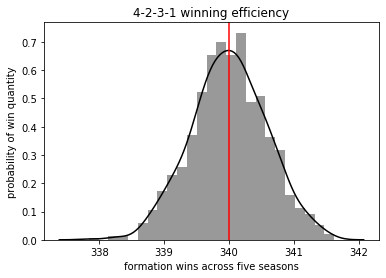

In [287]:
# 4-2-3-1 mean distribution
sns.distplot(get_sample_means(663,(340/663),500,1000),color='k')
plt.axvline(x=340,color='red')
plt.xlabel('formation wins across five seasons')
plt.ylabel('probability of win quantity')
plt.title('4-2-3-1 winning efficiency')
print(340/663)

In [296]:
round(np.mean(get_sample_means(304,(163/304),200,1000)),3)

162.956

In [297]:
# population variance
binomial_var_2 = (304*(163/304)*(1-163/304))
binomial_std_2 = binomial_var_2**.5
binomial_std_2

8.694939544597796

0.5361842105263158


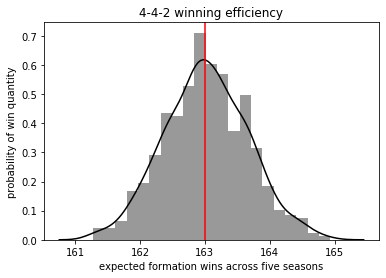

In [248]:
# 4-4-2 mean distribution
sns.distplot(get_sample_means(304,(163/304),200,1000),color='k')
plt.axvline(x=163,color='red')
plt.xlabel('expected formation wins across five seasons')
plt.ylabel('probability of win quantity')
plt.title('4-4-2 winning efficiency')
print(163/304)

In [298]:
round(np.mean(get_sample_means(150,(71/150),100,1000)),3)

70.999

In [299]:
# population variance
binomial_var_3 = (150*(71/150)*(1-71/150))
binomial_std_3 = binomial_var_3**.5
binomial_std_3

6.115008857993039

0.47333333333333333


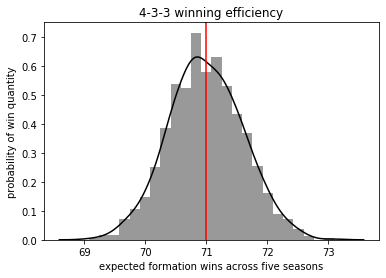

In [249]:
# 4-3-3 mean distribution
sns.distplot(get_sample_means(150,(71/150),100,1000),color='k')
plt.axvline(x=71,color='red')
plt.xlabel('expected formation wins across five seasons')
plt.ylabel('probability of win quantity')
plt.title('4-3-3 winning efficiency')
print(71/150)

In [306]:
#sample_xyz
stats.zscore(sample_xyz).mean()

-3.220801403358564e-14

In [310]:
#sample_xy
stats.zscore(sample_xy).mean()

1.312017161581025e-14

In [314]:
#sample_x
stats.zscore(sample_x).mean()

9.615419571673556e-15